In [20]:
import pandas as pd
from scipy.stats import normaltest
df = pd.read_csv('./df_security_concat.csv', encoding='cp949')
df

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,-4,0.0271,90.36
1,강원도,고성군,422,-2,94,-4,0.0271,90.36
2,강원도,동해시,330,4555,184,-4,0.0271,90.36
3,강원도,삼척시,932,7813,46,-4,0.0271,90.36
4,강원도,속초시,441,3118,-3,-4,0.0271,90.36
5,강원도,양구군,296,190,22,-4,0.0271,90.36
6,강원도,양양군,347,4391,40,-4,0.0271,90.36
7,강원도,영월군,281,2,-3,-4,0.0271,90.36
8,강원도,원주시,2820,10937,986,-4,0.0271,90.36
9,강원도,인제군,280,2034,-3,-4,0.0271,90.36


In [16]:
# 정규분포 검정 함수
def is_normal(column):
    stat, p = normaltest(column)
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False

# int 및 float 컬럼의 정규분포 여부 확인
for col in df.select_dtypes(include=['int', 'float']):
    if is_normal(df[col]):
        print(col, "is normally distributed")
    else:
        print(col, "is not normally distributed")


crime_rate is not normally distributed
avg_pop_density is not normally distributed


### 정규분포를 따르지 않는 컬럼 : 
crim_rate
avg_pop_density

###  박스플롯(결측치를 이상치로 변경한 df)

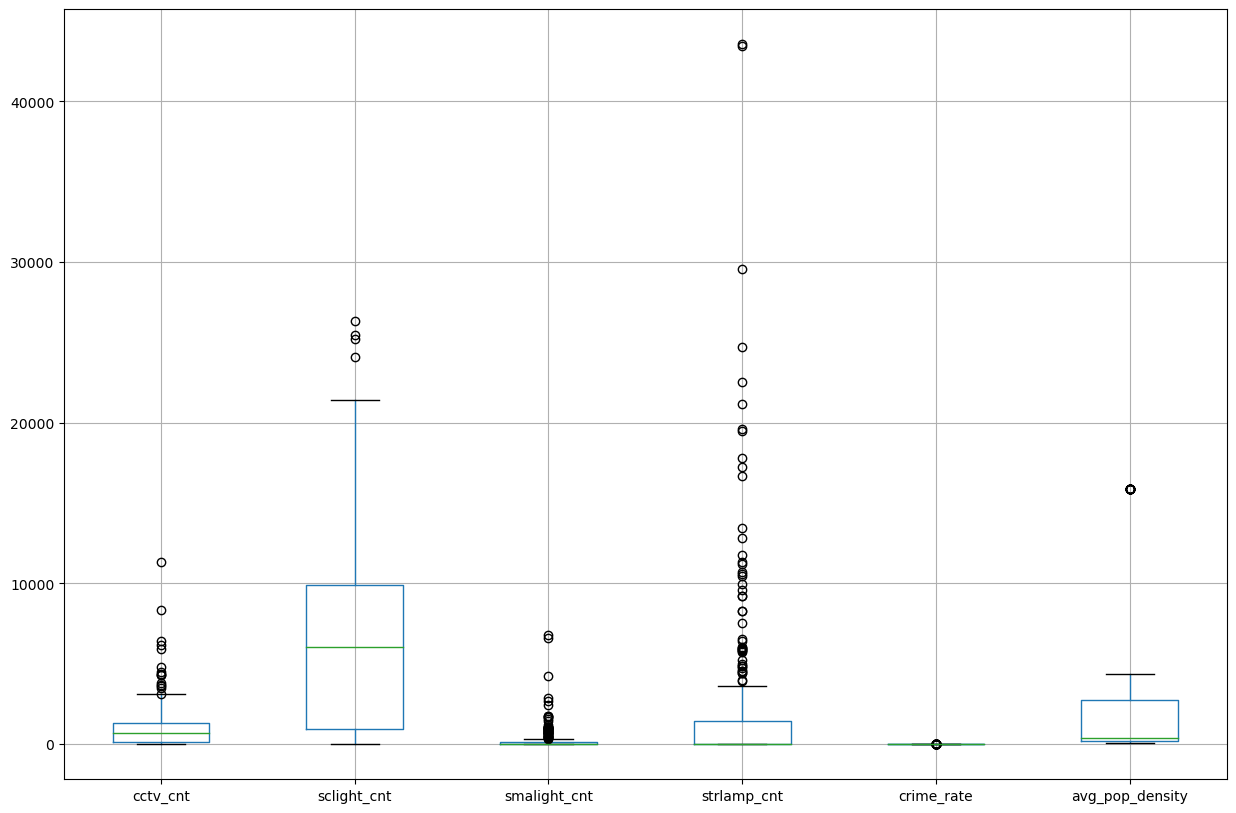

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 박스플롯으로 전체 데이터프레임 시각화하기
fig, ax = plt.subplots(figsize=(15,10))
df.boxplot(ax=ax)
plt.show()

#### 1. cctv_cnt / sclight_cnt / smalight_cnt 확인

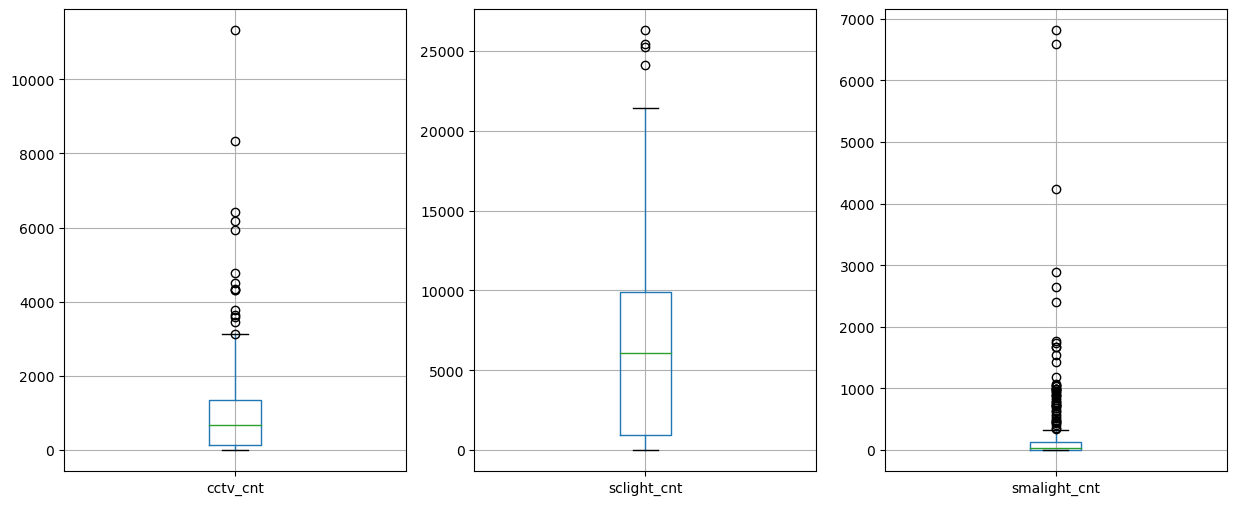

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
df[['cctv_cnt']].boxplot(ax=axes[0])
df[['sclight_cnt']].boxplot(ax=axes[1])
df[['smalight_cnt']].boxplot(ax=axes[2])
# df[['strlamp_cnt']].boxplot(ax=axes[3])
# df[['crime_rate']].boxplot(ax=axes[4])
# df[['avg_pop_density']].boxplot(ax=axes[5])

# fig_cctv, ax_cctv = plt.subplots(figsize=(6,10))
# df[['cctv_cnt']].boxplot(ax=ax_cctv)

# fig_sclight, ax_sclight = plt.subplots(figsize=(6,10))
# df[['sclight_cnt']].boxplot(ax=ax_sclight)

plt.show()

#### 2.  strlmap_cnt / crime_rate / avg_pop_density 확인

<AxesSubplot:>

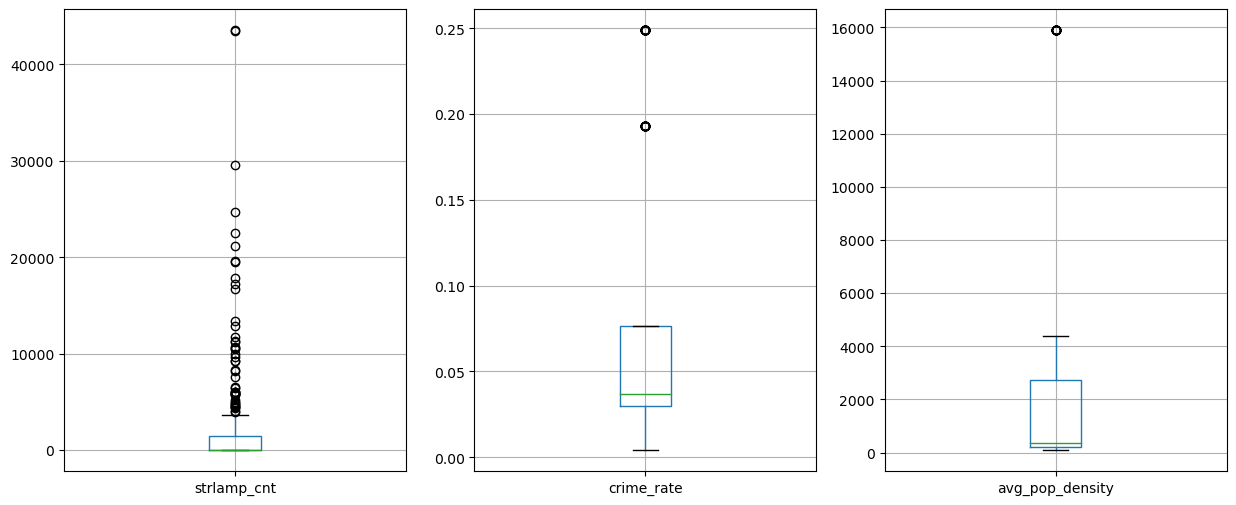

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
df[['strlamp_cnt']].boxplot(ax=axes[0])
df[['crime_rate']].boxplot(ax=axes[1])
df[['avg_pop_density']].boxplot(ax=axes[2])

####  6개 요소 한번에 확인

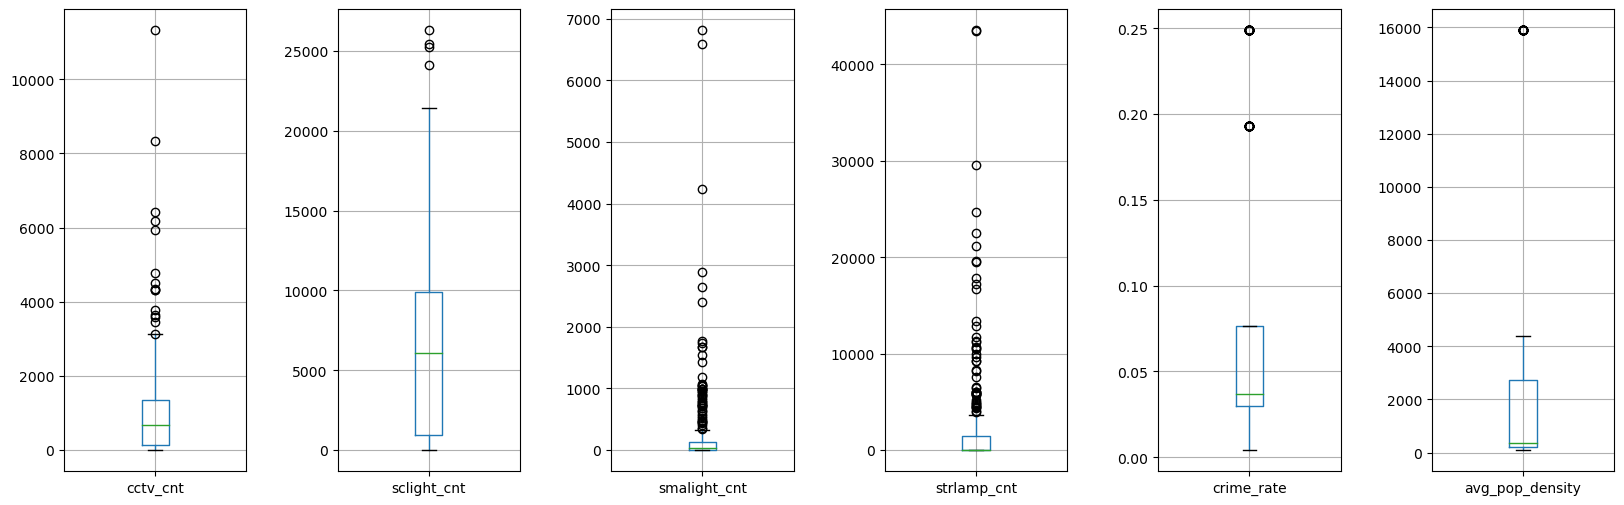

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 6), gridspec_kw={'wspace':0.5})
df[['cctv_cnt']].boxplot(ax=axes[0])
df[['sclight_cnt']].boxplot(ax=axes[1])
df[['smalight_cnt']].boxplot(ax=axes[2])
df[['strlamp_cnt']].boxplot(ax=axes[3])
df[['crime_rate']].boxplot(ax=axes[4])
df[['avg_pop_density']].boxplot(ax=axes[5])
fig.subplots_adjust(wspace=0.3)


####  이상치를 다시 결측치로 바꾸기 
#### 이유 ->  특정 컬럼에 이상치가 많이 포함되어 있는 경우, 박스플롯 분포가 일반데이터 값을 이상치로 판단하여, 이상치 분포가 이상하게 나오는 문제점 발견 

#### ex) strlamp_cnt의 결측치를 -4로 대체/, 해당 컬럼에 결측치가 많음(=-4로 대체하였으므로 -4의 값이 많이 분포되어있음)
#### -> 박스플롯 시각화를 하였더니 일반 데이터 값을 이상치로 판단하여, 일반 데이터 값이 박스플롯을 벗어난 위치에 분포되어있음

In [9]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.reset_option('all')
df

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,-4,0.0271,90.36
1,강원도,고성군,422,-2,94,-4,0.0271,90.36
2,강원도,동해시,330,4555,184,-4,0.0271,90.36
3,강원도,삼척시,932,7813,46,-4,0.0271,90.36
4,강원도,속초시,441,3118,-3,-4,0.0271,90.36
...,...,...,...,...,...,...,...,...
272,충청북도,증평군,910,3869,8,-4,0.0299,219.20
273,충청북도,진천군,692,2,-3,121,0.0299,219.20
274,충청북도,청주시,9,25432,-3,-4,0.0299,219.20
275,충청북도,충주시,1578,10600,219,-4,0.0299,219.20


#### 이상치를 결측치로 바꾼 df

In [10]:
df.loc[df['cctv_cnt'] == -1, 'cctv_cnt'] = pd.NA
# df['cctv_cnt'].value_counts()
df.loc[df['sclight_cnt'] == -2, 'sclight_cnt'] = pd.NA
df.loc[df['smalight_cnt'] == -3, 'smalight_cnt'] = pd.NA
df.loc[df['strlamp_cnt'] == -4, 'strlamp_cnt'] = pd.NA
df_nona = df
df_nona

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,NaN,0.0271,90.36
1,강원도,고성군,422,<NA>,94,NaN,0.0271,90.36
2,강원도,동해시,330,4555,184,NaN,0.0271,90.36
3,강원도,삼척시,932,7813,46,NaN,0.0271,90.36
4,강원도,속초시,441,3118,<NA>,NaN,0.0271,90.36
...,...,...,...,...,...,...,...,...
272,충청북도,증평군,910,3869,8,<NA>,0.0299,219.20
273,충청북도,진천군,692,2,<NA>,121,0.0299,219.20
274,충청북도,청주시,9,25432,<NA>,<NA>,0.0299,219.20
275,충청북도,충주시,1578,10600,219,<NA>,0.0299,219.20


####  이상치 없는 df 박스플롯 시각화 -> 결측치 있는 컬럼 추출 안됨

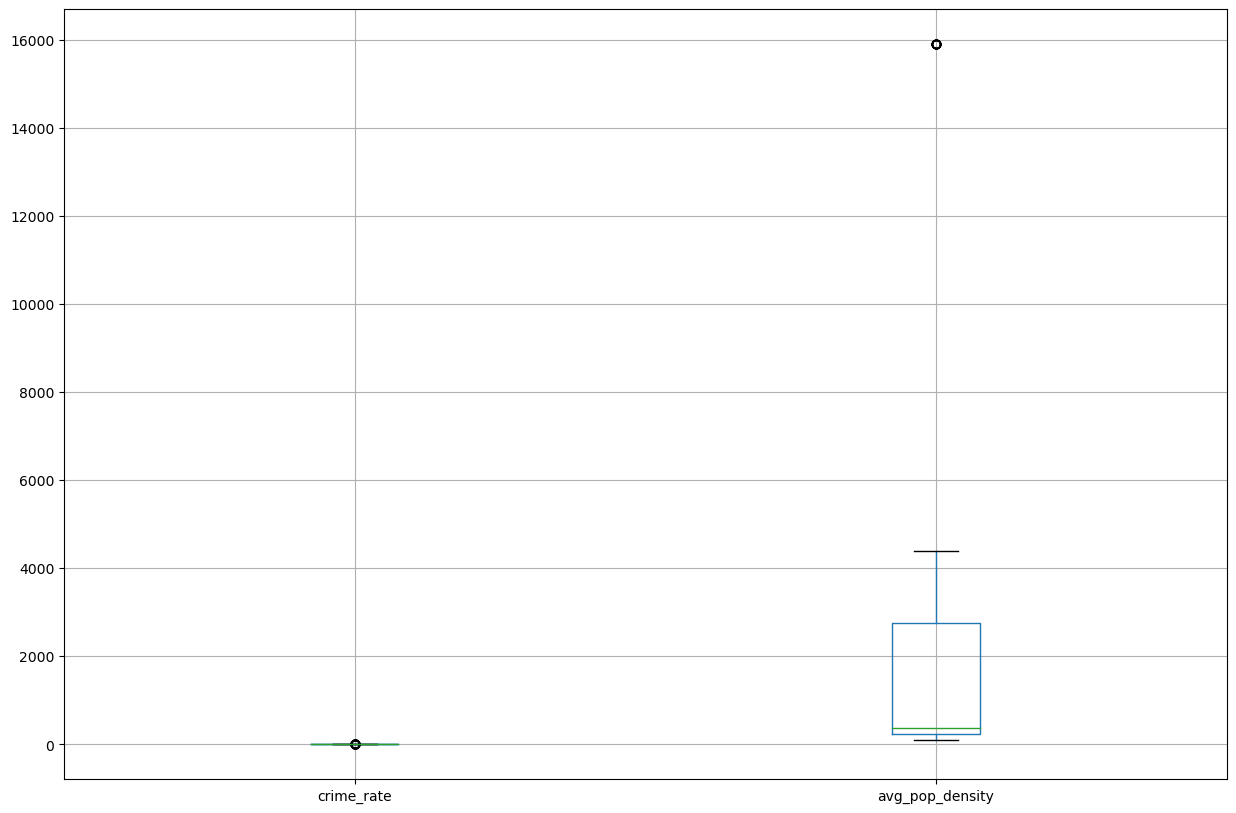

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 박스플롯으로 전체 데이터프레임 시각화하기
fig, ax = plt.subplots(figsize=(15,10))
df_nona.boxplot(ax=ax)
plt.show()

#### 결측치가 있는 컬럼을 날리고 concat뒤 컬럼별로 박스플롯 시각화 진행

#### 1. cctv_cnt

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,<NA>,0.0271,90.36
1,강원도,고성군,422,<NA>,94,<NA>,0.0271,90.36
2,강원도,동해시,330,4555,184,<NA>,0.0271,90.36
3,강원도,삼척시,932,7813,46,<NA>,0.0271,90.36
4,강원도,속초시,441,3118,<NA>,<NA>,0.0271,90.36
5,강원도,양구군,296,190,22,<NA>,0.0271,90.36
6,강원도,양양군,347,4391,40,<NA>,0.0271,90.36
7,강원도,영월군,281,2,<NA>,<NA>,0.0271,90.36
8,강원도,원주시,2820,10937,986,<NA>,0.0271,90.36
9,강원도,인제군,280,2034,<NA>,<NA>,0.0271,90.36


In [13]:
df['cctv_cnt'].isnull().sum() # 25
df['sclight_cnt'].isnull().sum() # 44
df['smalight_cnt'].isnull().sum() # 65
df['strlamp_cnt'].isnull().sum() # 181

181

#### 이상치를 99999로 변경 후 시각화 진행

In [21]:
df.loc[df['cctv_cnt'] < 1, 'cctv_cnt'] = 99991
df.loc[df['sclight_cnt'] < 1, 'sclight_cnt'] = 99992
df.loc[df['smalight_cnt'] < 1, 'smalight_cnt'] = 99993
df.loc[df['strlamp_cnt'] < 1, 'strlamp_cnt'] = 99994
# df.loc[df['cctv_cnt'] < 1, 'cctv_cnt'] = 99991
df

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,99994,0.0271,90.36
1,강원도,고성군,422,99992,94,99994,0.0271,90.36
2,강원도,동해시,330,4555,184,99994,0.0271,90.36
3,강원도,삼척시,932,7813,46,99994,0.0271,90.36
4,강원도,속초시,441,3118,99993,99994,0.0271,90.36
5,강원도,양구군,296,190,22,99994,0.0271,90.36
6,강원도,양양군,347,4391,40,99994,0.0271,90.36
7,강원도,영월군,281,2,99993,99994,0.0271,90.36
8,강원도,원주시,2820,10937,986,99994,0.0271,90.36
9,강원도,인제군,280,2034,99993,99994,0.0271,90.36


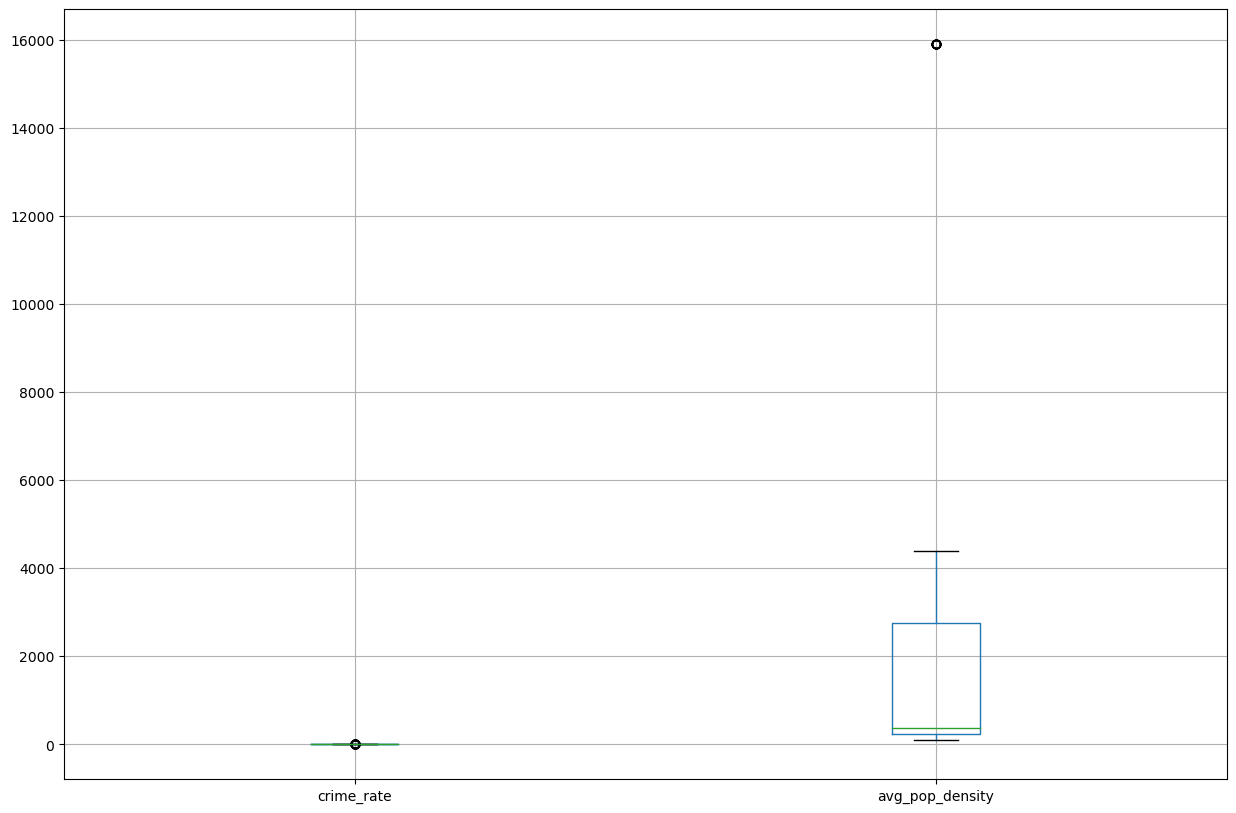

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 박스플롯으로 전체 데이터프레임 시각화하기
fig, ax = plt.subplots(figsize=(15,10))
df.boxplot(ax=ax)
plt.show()

### city 충복치 확인 후 지우기
* state는 다르지만 city가 같은 데이터가 중복되는 문제 발생
* 세종특별자치시에서 city가 중복된 3개 지움

In [29]:
df

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density,new_state
0,강원도,강릉시,1699,12301,64,99994,0.0271,90.36,강원도 강릉시
1,강원도,고성군,422,99992,94,99994,0.0271,90.36,강원도 고성군
2,강원도,동해시,330,4555,184,99994,0.0271,90.36,강원도 동해시
3,강원도,삼척시,932,7813,46,99994,0.0271,90.36,강원도 삼척시
4,강원도,속초시,441,3118,99993,99994,0.0271,90.36,강원도 속초시
5,강원도,양구군,296,190,22,99994,0.0271,90.36,강원도 양구군
6,강원도,양양군,347,4391,40,99994,0.0271,90.36,강원도 양양군
7,강원도,영월군,281,2,99993,99994,0.0271,90.36,강원도 영월군
8,강원도,원주시,2820,10937,986,99994,0.0271,90.36,강원도 원주시
9,강원도,인제군,280,2034,99993,99994,0.0271,90.36,강원도 인제군


In [35]:
df[df.new_state.duplicated()]

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density,new_state


In [37]:
# drop 전 행 개수 : 277
df.shape

(274, 9)

In [34]:
idx_to_drop = [163,167,168]
df.drop(idx_to_drop, axis=0, inplace=True)

In [27]:
df[df.city.str.contains('대평동')].city.unique()

array(['대평동'], dtype=object)

In [28]:
df['new_state'] = df.state + ' ' + df.city

In [24]:
df[(df.strlamp_cnt==99994) & (df.state == '경상남도')]['city'].unique()

array(['거제시', '거창군', '고성군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군',
       '거제면', '진영읍'], dtype=object)

In [38]:
df.to_csv('./df_security_cancat-2.csv',encoding='cp949')